<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Description</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Challenge-Description" data-toc-modified-id="Challenge-Description-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Challenge Description</a></span></li></ul></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Qn1:-the-customer-who-bought-the-most-items-overall-in-her-lifetime" data-toc-modified-id="Qn1:-the-customer-who-bought-the-most-items-overall-in-her-lifetime-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Qn1: the customer who bought the most items overall in her lifetime</a></span></li><li><span><a href="#Qn2:-for-each-item,-the-customer-who-bought-that-product-the-most" data-toc-modified-id="Qn2:-for-each-item,-the-customer-who-bought-that-product-the-most-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Qn2: for each item, the customer who bought that product the most</a></span></li><li><span><a href="#Qn3:-Modelling-Clustering-of-Similar-Items" data-toc-modified-id="Qn3:-Modelling-Clustering-of-Similar-Items-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Qn3: Modelling Clustering of Similar Items</a></span><ul class="toc-item"><li><span><a href="#similarity-matrix" data-toc-modified-id="similarity-matrix-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>similarity matrix</a></span></li><li><span><a href="#Choose-number-of-clusters-k-using-Elbow-Method" data-toc-modified-id="Choose-number-of-clusters-k-using-Elbow-Method-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Choose number of clusters k using Elbow Method</a></span></li><li><span><a href="#Fitting-the-KMeans-model" data-toc-modified-id="Fitting-the-KMeans-model-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Fitting the KMeans model</a></span></li><li><span><a href="#Reduce-dimension-using-PCA-and-visualize" data-toc-modified-id="Reduce-dimension-using-PCA-and-visualize-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Reduce dimension using PCA and visualize</a></span></li><li><span><a href="#Find-the-clustered-groups" data-toc-modified-id="Find-the-clustered-groups-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Find the clustered groups</a></span></li></ul></li><li><span><a href="#Modelling:-Agglomerative-Clustering" data-toc-modified-id="Modelling:-Agglomerative-Clustering-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling: Agglomerative Clustering</a></span></li><li><span><a href="#Time-taken" data-toc-modified-id="Time-taken-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Time taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Problem Description

### Goal

Online shops often sell tons of different items and this can become very messy very quickly!

Data science can be extremely useful to automatically organize the products in categories so that they can be easily found by the customers.

The goal of this challenge is to look at user purchase history and create categories of items that are likely to be bought together and, therefore, should belong to the same section.

### Challenge Description

Company XYZ is an online grocery store. In the current version of the website, they have manually grouped the items into a few categories based on their experience.

However, they now have a lot of data about user purchase history. Therefore, they would like to
put the data into use!

This is what they asked you to do:
1. The company founder wants to meet with some of the best customers to go through a focus group with them. You are asked to send the ID of the following customers to the founder:

a. The customer who bought the most items overall in her lifetime

b. For each item, the customer who bought that product the most

2. Cluster items based on user co-purchase history. That is, create clusters of products that have the highest probability of being bought together. The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster.

# Imports

In [1]:
import time
time_start_notebook = time.time()

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

pd.options.display.max_columns = 100

SEED = 100
np.random.seed(SEED) # we need this in each cell that calls random

plt.style.use('ggplot')
%matplotlib inline


from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Load the data

In [3]:
%%bash

cd ../Datasets/Business_Projects/Clustering_Grocery_Items/
pwd
ls
cd -

/Volumes/Media/github/Datasets/Business_Projects/Clustering_Grocery_Items
item_to_id.csv
purchase_history.csv
/Volumes/Media/github/Project_Clustering_Grocery_Items


In [4]:
p = "/Volumes/Media/github/Datasets/Business_Projects/Clustering_Grocery_Items"
df_item = pd.read_csv(p + '/item_to_id.csv')

print(df_item.shape)
df_item.head(2).append(df_item.tail(2))

(48, 2)


,Item_name,Item_id
0,coffee,43
1,tea,23
46,baby items,4
47,pet items,3


In [5]:
df_item['Item_id'].nunique(), df_item.shape[0] # we have 48 different item_id

(48, 48)

In [6]:
df_item.set_index('Item_id',inplace=True)
df_item.head(2)

,Item_name
Item_id,
43,coffee
23,tea


In [7]:
df = pd.read_csv(p + '/purchase_history.csv')

print(df.shape)
df.head(2).append(df.tail(2)) # we have 39k customers

(39474, 2)


,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
39472,651509,"13,39,20,32,37,1,3,18,34"
39473,517744,"39,40,20,3,10,42,38,43,28,25,13"


In [8]:
df['user_id'].nunique(), df.shape[0]

(24885, 39474)

In [9]:
# user_id is not unique, same user has shopped more than once.
# we will get the data for each id using df.explode

In [10]:
df['id'] = df['id'].astype(str).str.split(',')
df = df.explode('id')

df.head(2)

,user_id,id
0,222087,27
0,222087,26


In [11]:
df = pd.crosstab(df['user_id'], df['id'],margins=True,margins_name='total')
df.head()

id,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,45,46,47,48,5,6,7,8,9,total
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
47,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,13
68,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,8
113,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,11
123,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
223,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,11


In [12]:
df.columns

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '5', '6', '7', '8', '9',
       'total'],
      dtype='object', name='id')

In [13]:
# df_item['Item_name'].to_dict()

In [14]:
mapping = df_item['Item_name'].to_dict()
mapping = {str(k): v for k,v in mapping.items()} # make string
# mapping

In [15]:
df.columns = df.columns.map(mapping).fillna('item_total')
df.head(2)

id,sugar,carrots,cereals,shampoo,bagels,eggs,aluminum foil,milk,beef,laundry detergent,shaving cream,lettuce,grapefruit,cheeses,frozen vegetables,tea,paper towels,cherries,spaghetti sauce,dishwashing,canned vegetables,hand soap,pet items,flour,pasta,apples,toilet paper,tortillas,soap,ice cream,dinner rolls,juice,sandwich loaves,baby items,berries,ketchup,cucumbers,coffee,broccoli,cauliflower,bananas,pork,yogurt,waffles,poultry,sandwich bags,butter,soda,item_total
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
47,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,13
68,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,8


In [16]:
df.index = 'user_' + df.index.astype(str)

df.head(2).append(df.tail(2))

id,sugar,carrots,cereals,shampoo,bagels,eggs,aluminum foil,milk,beef,laundry detergent,shaving cream,lettuce,grapefruit,cheeses,frozen vegetables,tea,paper towels,cherries,spaghetti sauce,dishwashing,canned vegetables,hand soap,pet items,flour,pasta,apples,toilet paper,tortillas,soap,ice cream,dinner rolls,juice,sandwich loaves,baby items,berries,ketchup,cucumbers,coffee,broccoli,cauliflower,bananas,pork,yogurt,waffles,poultry,sandwich bags,butter,soda,item_total
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
user_47,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,13
user_68,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,8
user_1499974,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,13
user_total,9119,8859,2730,3270,8695,5700,3281,5782,8627,6000,3346,14473,8951,5666,5977,8723,3278,9019,6449,6115,6365,3356,7204,2631,2731,9008,3322,8782,3282,6042,8695,8814,8728,3262,8878,6420,9050,8784,8980,8902,8921,8682,5673,2817,8730,3343,5717,8816,319995


In [17]:
print([f"`{c}`" for c in df.columns]) # make sure there are not bad columns

['`sugar`', '`carrots`', '`cereals`', '`shampoo`', '`bagels`', '`eggs`', '`aluminum foil`', '`milk`', '`beef`', '`laundry detergent`', '`shaving cream`', '`lettuce`', '`grapefruit`', '`cheeses`', '`frozen vegetables`', '`tea`', '`paper towels`', '`cherries`', '`spaghetti sauce`', '`dishwashing\xa0`', '`canned vegetables`', '`hand soap`', '`pet items`', '`flour`', '`pasta`', '`apples`', '`toilet paper`', '`tortillas`', '`soap`', '`ice cream`', '`dinner rolls`', '`juice`', '`sandwich loaves`', '`baby items`', '`berries`', '`ketchup`', '`cucumbers`', '`coffee`', '`broccoli`', '`cauliflower`', '`bananas`', '`pork`', '`yogurt`', '`waffles`', '`poultry`', '`sandwich bags`', '`butter`', '`soda`', '`item_total`']


In [18]:
df = df.rename(columns = lambda x: x.strip())
df = df.rename(columns = lambda x: x.replace(' ','_'))

print([f"`{c}`" for c in df.columns]) # make sure there are not bad columns

['`sugar`', '`carrots`', '`cereals`', '`shampoo`', '`bagels`', '`eggs`', '`aluminum_foil`', '`milk`', '`beef`', '`laundry_detergent`', '`shaving_cream`', '`lettuce`', '`grapefruit`', '`cheeses`', '`frozen_vegetables`', '`tea`', '`paper_towels`', '`cherries`', '`spaghetti_sauce`', '`dishwashing`', '`canned_vegetables`', '`hand_soap`', '`pet_items`', '`flour`', '`pasta`', '`apples`', '`toilet_paper`', '`tortillas`', '`soap`', '`ice_cream`', '`dinner_rolls`', '`juice`', '`sandwich_loaves`', '`baby_items`', '`berries`', '`ketchup`', '`cucumbers`', '`coffee`', '`broccoli`', '`cauliflower`', '`bananas`', '`pork`', '`yogurt`', '`waffles`', '`poultry`', '`sandwich_bags`', '`butter`', '`soda`', '`item_total`']


# Qn1: the customer who bought the most items overall in her lifetime

In [19]:
df.iloc[:-1].nlargest(5,'item_total').iloc[:,-1:]

id,item_total
user_id,
user_269335,72
user_367872,70
user_397623,64
user_599172,64
user_377284,63


In [20]:
"""
This is the list of top5 users who bought the most items.
""";

# Qn2: for each item, the customer who bought that product the most

In [21]:
df.head(2).append(df.tail(2))

id,sugar,carrots,cereals,shampoo,bagels,eggs,aluminum_foil,milk,beef,laundry_detergent,shaving_cream,lettuce,grapefruit,cheeses,frozen_vegetables,tea,paper_towels,cherries,spaghetti_sauce,dishwashing,canned_vegetables,hand_soap,pet_items,flour,pasta,apples,toilet_paper,tortillas,soap,ice_cream,dinner_rolls,juice,sandwich_loaves,baby_items,berries,ketchup,cucumbers,coffee,broccoli,cauliflower,bananas,pork,yogurt,waffles,poultry,sandwich_bags,butter,soda,item_total
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
user_47,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,13
user_68,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,8
user_1499974,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,13
user_total,9119,8859,2730,3270,8695,5700,3281,5782,8627,6000,3346,14473,8951,5666,5977,8723,3278,9019,6449,6115,6365,3356,7204,2631,2731,9008,3322,8782,3282,6042,8695,8814,8728,3262,8878,6420,9050,8784,8980,8902,8921,8682,5673,2817,8730,3343,5717,8816,319995


In [22]:
df.iloc[:-1].T.idxmax(axis=1).to_frame('user').head()

,user
id,
sugar,user_31625
carrots,user_618914
cereals,user_367872
shampoo,user_557904
bagels,user_653800


In [23]:
df.iloc[:-1].apply(lambda s: pd.Series(
    [s.idxmax(), s.max()],
    index=['max_user','max_count']
    )).T.head()

,max_user,max_count
id,,
sugar,user_31625,4
carrots,user_618914,4
cereals,user_367872,3
shampoo,user_557904,3
bagels,user_653800,4


In [58]:
ans = df.iloc[:-1].apply(lambda s: pd.Series(
    [(s[s==s.max()]).index.tolist(), s.max()],
    index=['max_user','max_count']
    )).T.sort_index()

ans.head()

,max_user,max_count
id,,
aluminum_foil,[user_143741],3
apples,"[user_109578, user_384935, user_545108, user_1303742, user_1310896]",4
baby_items,"[user_5289, user_73071, user_432842]",3
bagels,"[user_653800, user_820788]",4
bananas,"[user_1218645, user_1269111]",4


In [25]:
# validate the result
df.head(2)

id,sugar,carrots,cereals,shampoo,bagels,eggs,aluminum_foil,milk,beef,laundry_detergent,shaving_cream,lettuce,grapefruit,cheeses,frozen_vegetables,tea,paper_towels,cherries,spaghetti_sauce,dishwashing,canned_vegetables,hand_soap,pet_items,flour,pasta,apples,toilet_paper,tortillas,soap,ice_cream,dinner_rolls,juice,sandwich_loaves,baby_items,berries,ketchup,cucumbers,coffee,broccoli,cauliflower,bananas,pork,yogurt,waffles,poultry,sandwich_bags,butter,soda,item_total
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
user_47,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,13
user_68,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,8


In [26]:
df.loc['user_31625'].to_frame().T # this user has bought 4 sugars in total

id,sugar,carrots,cereals,shampoo,bagels,eggs,aluminum_foil,milk,beef,laundry_detergent,shaving_cream,lettuce,grapefruit,cheeses,frozen_vegetables,tea,paper_towels,cherries,spaghetti_sauce,dishwashing,canned_vegetables,hand_soap,pet_items,flour,pasta,apples,toilet_paper,tortillas,soap,ice_cream,dinner_rolls,juice,sandwich_loaves,baby_items,berries,ketchup,cucumbers,coffee,broccoli,cauliflower,bananas,pork,yogurt,waffles,poultry,sandwich_bags,butter,soda,item_total
user_31625,4,2,0,0,0,0,0,0,0,0,3,5,1,0,2,1,0,2,0,1,1,2,1,1,1,1,0,0,2,0,3,0,0,0,1,0,2,2,4,2,3,1,1,1,1,0,1,2,54


In [27]:
df[['sugar']].T.filter(regex='user_31625')

user_id,user_31625
id,
sugar,4


# Qn3: Modelling Clustering of Similar Items
> Cluster items based on user co-purchase history. That is, create clusters of products that
have the highest probability of being bought together. The goal of this is to replace the
old/manually created categories with these new ones. Each item can belong to just one
cluster.

In [28]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
df.head(2).append(df.tail(2)).iloc[:,-5:]

id,poultry,sandwich_bags,butter,soda,item_total
user_id,,,,,
user_47,0,0,0,0,13
user_68,1,0,0,0,8
user_1499974,0,1,1,0,13
user_total,8730,3343,5717,8816,319995


In [30]:
df.shape

(24886, 49)

In [31]:
# remove colmun and index named total
df = df.iloc[:-1,:-1]

print(df.shape)

df.head(2).append(df.tail(2)).iloc[:,-5:]

(24885, 48)


id,waffles,poultry,sandwich_bags,butter,soda
user_id,,,,,
user_47,0,0,0,0,0
user_68,0,1,0,0,0
user_1499817,0,1,0,1,1
user_1499974,1,0,1,1,0


## similarity matrix

In [32]:
from sklearn.preprocessing import normalize

item_norm = normalize(df,axis=0) # normalize each items (NOT users)
item_sim = item_norm.T.dot(item_norm)

df_item_sim = pd.DataFrame(item_sim,
                       index=df.columns,
                       columns=df.columns)

print(df_item_sim.shape)
df_item_sim.head(2)

(48, 48)


id,sugar,carrots,cereals,shampoo,bagels,eggs,aluminum_foil,milk,beef,laundry_detergent,shaving_cream,lettuce,grapefruit,cheeses,frozen_vegetables,tea,paper_towels,cherries,spaghetti_sauce,dishwashing,canned_vegetables,hand_soap,pet_items,flour,pasta,apples,toilet_paper,tortillas,soap,ice_cream,dinner_rolls,juice,sandwich_loaves,baby_items,berries,ketchup,cucumbers,coffee,broccoli,cauliflower,bananas,pork,yogurt,waffles,poultry,sandwich_bags,butter,soda
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sugar,1.000000,0.390641,0.263889,0.260103,0.392767,0.336052,0.258082,0.338954,0.386424,0.338680,0.273667,0.506895,0.391199,0.339366,0.344111,0.397598,0.272608,0.398554,0.351104,0.338670,0.357550,0.270909,0.420145,0.259259,0.264944,0.395828,0.275207,0.403212,0.262791,0.345662,0.395159,0.401602,0.388034,0.296986,0.390286,0.358599,0.393056,0.395696,0.396766,0.390253,0.394998,0.392164,0.328221,0.271132,0.388250,0.271743,0.335303,0.403690
carrots,0.390641,1.000000,0.232861,0.246780,0.379568,0.323319,0.257784,0.325523,0.386199,0.325983,0.256384,0.527894,0.382947,0.322191,0.335931,0.377047,0.258435,0.384620,0.332691,0.330508,0.343154,0.257511,0.352597,0.236888,0.239542,0.375208,0.261217,0.379041,0.248531,0.324006,0.378677,0.382540,0.381372,0.258313,0.380613,0.333471,0.488734,0.372790,0.483275,0.483897,0.384714,0.381086,0.327807,0.234254,0.376518,0.250765,0.338472,0.381207


## Choose number of clusters k using Elbow Method

Each observation is allocated to the closest cluster, and the distance between an observation and a cluster is calculated from the Euclidean distance between the observation and the cluster center.Each cluster center will then be updated as the mean for observations in each cluster.
The within-cluster sum of squares is:

$$
WCSS = \sum_{k=1}^{K} \sum_{i \in S_k} \sum_{j=1}^{p} {(x_{ij} - \bar{x}_{kj})}^2
$$

where, $S_k$ is the set of observations in the kth cluster and xbar_kj is the
jth variable of the cluster center for the kth cluster.

There are K clusters and in a given cluster there j data points.

**Silhouette Score**  
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.

The Silhouette Coefficient for a sample is:
```
silhouette_score = (b - a) / max(a, b)

a = mean intra-cluster distance
b = mean nearest-cluster distance
```


References:  
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
kmeans = KMeans()
kmeans

KMeans()

In [35]:
inertias = [] # wcss 
sil_scores = []

ks = range(2,30)
for k in ks:
    kmeans = KMeans(n_clusters=k,random_state=SEED,init='k-means++')
    kmeans.fit(df_item_sim)
    
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_item_sim, kmeans.predict(df_item_sim)))

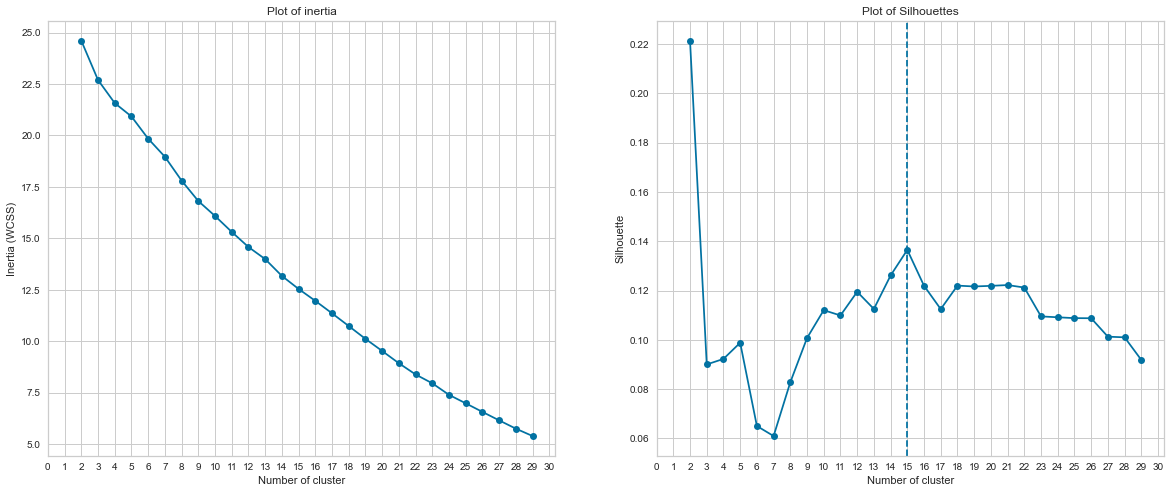

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))

ax1.plot(ks, inertias,marker='o')
ax1.set_xticks(range(len(ks)+3));
ax1.set_title('Plot of inertia')
ax1.set_xlabel('Number of cluster')
ax1.set_ylabel('Inertia (WCSS)');

# silhoutte plot
ax2.plot(ks,sil_scores,marker='o')
ax2.set_xticks(range(len(ks)+3));
ax2.set_title('Plot of Silhouettes')
ax2.set_xlabel('Number of cluster')
ax2.set_ylabel('Silhouette');

ax2.axvline(15,color='b',ls='--');

In [37]:
"""
1. Looking at left Elbow curve, we don't see any clear elbow where we can 
   select a number of cluster from the bottom of elbow for wcss curve.
   
2. Lookint at right side Silhouette Score plot, we choose the number of cluster
with highest silhouette score.

""";

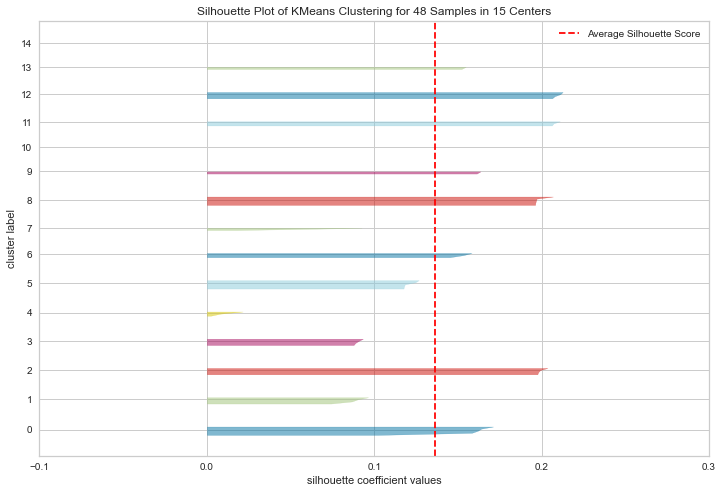

/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7feee8bf6ad0>,
                     colors='yellowbrick', model=None)

In [38]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer

n_clusters = 15
fig,ax = plt.subplots(figsize=(12,8))
silhouette_visualizer(KMeans(n_clusters, random_state=SEED),
                      df_item_sim,
                      colors='yellowbrick',
                      ax=ax
                     )

## Fitting the KMeans model

In [39]:
n_clusters = 15

kmeans = KMeans(n_clusters=n_clusters,random_state=SEED,init='k-means++')

kmeans.fit(df_item_sim)

KMeans(n_clusters=15, random_state=100)

In [40]:
kmeans.labels_

array([ 7,  0, 14,  1, 12,  5,  3,  5, 11,  9,  1,  0,  8,  5, 13,  2,  3,
        8,  6,  9,  6,  1,  7,  4,  4,  8,  3, 12,  1, 13, 12,  2, 12, 10,
        8,  6,  0,  2,  0,  0,  8, 11,  5,  4, 11,  3,  5,  2],
      dtype=int32)

## Reduce dimension using PCA and visualize

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2,random_state=SEED)

arr_pca = pca.fit_transform(df_item_sim)

df_pca = pd.DataFrame(arr_pca, columns=['pc_0', 'pc_1'],
                     index=df_item_sim.index.to_numpy())

print(df_pca.shape)
df_pca.head(2)

(48, 2)


,pc_0,pc_1
sugar,0.355639,-0.025103
carrots,0.353093,0.000351


In [43]:
kmeans.labels_

array([ 7,  0, 14,  1, 12,  5,  3,  5, 11,  9,  1,  0,  8,  5, 13,  2,  3,
        8,  6,  9,  6,  1,  7,  4,  4,  8,  3, 12,  1, 13, 12,  2, 12, 10,
        8,  6,  0,  2,  0,  0,  8, 11,  5,  4, 11,  3,  5,  2],
      dtype=int32)

In [44]:
len(kmeans.labels_)

48

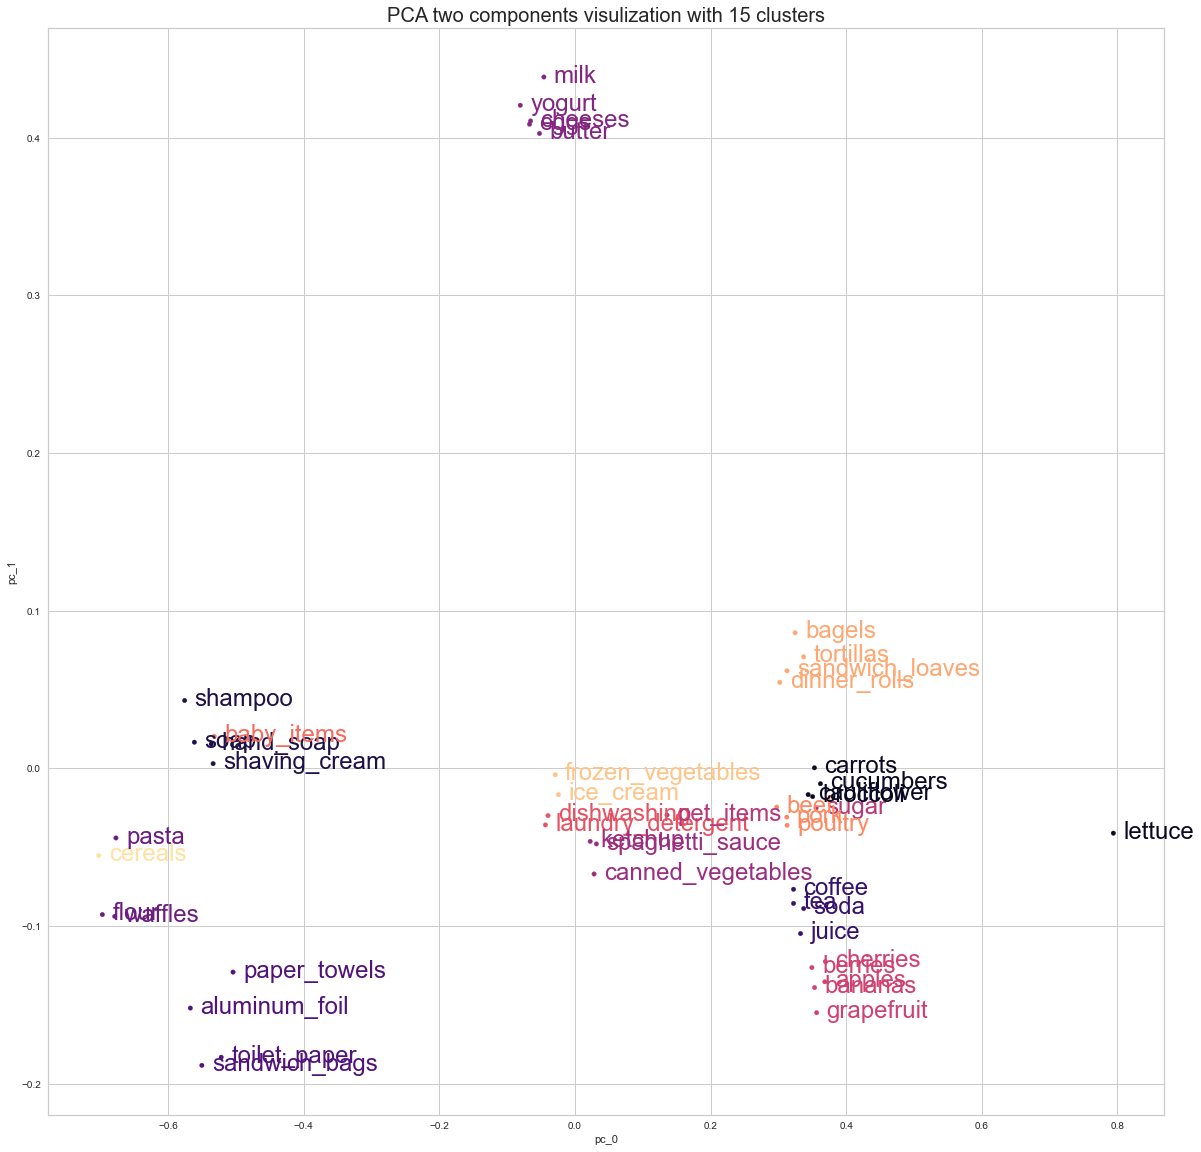

In [45]:
colors_dict = dict(enumerate(sns.color_palette('magma',n_clusters)))
mycolors = [colors_dict[k] for k in kmeans.labels_]

fig, ax = plt.subplots(figsize=(20,20))
df_pca.plot.scatter(x='pc_0',y='pc_1',color=mycolors,ax=ax)

i = 0
for name,(x,y) in df_pca.iloc[:,:2].iterrows():
    ax.annotate(name,[x,y], 
                xytext=(10,-5), 
                textcoords='offset points',
                size=24, 
                color=mycolors[i])
    i+=1

plt.title(f'PCA two components visulization with {n_clusters} clusters',fontsize=20);

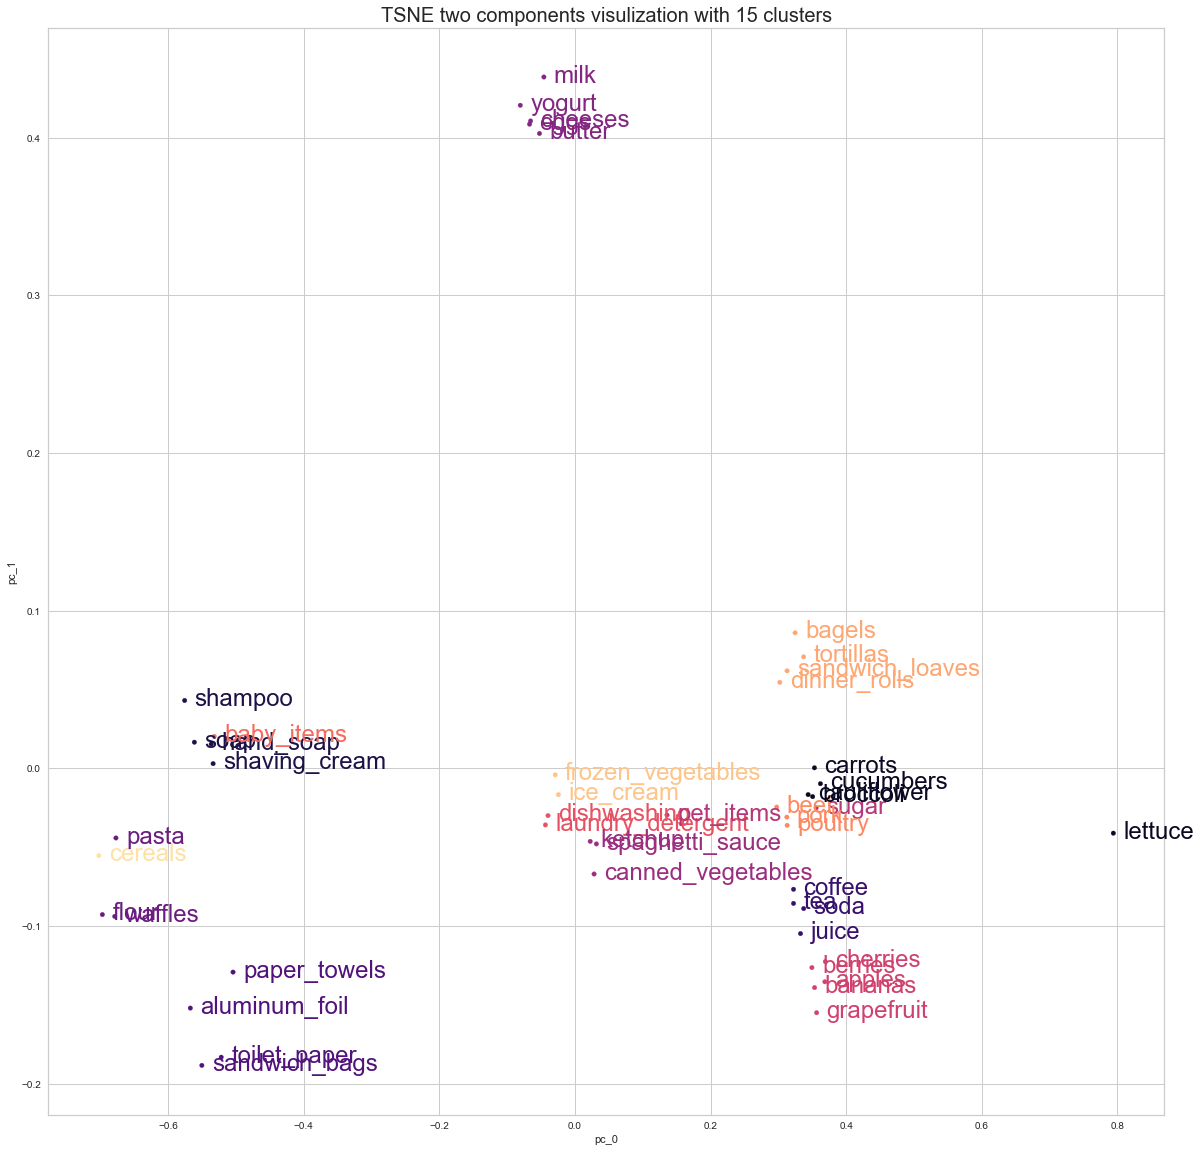

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=SEED)

arr_tsne = tsne.fit_transform(df_item_sim)

df_tsne = pd.DataFrame(arr_tsne, columns=['axis_0', 'axis_1'],
                     index=df_item_sim.index.to_numpy())


colors_dict = dict(enumerate(sns.color_palette('magma',n_clusters)))
mycolors = [colors_dict[k] for k in kmeans.labels_]

fig, ax = plt.subplots(figsize=(20,20))
df_pca.plot.scatter(x='pc_0',y='pc_1',color=mycolors,ax=ax)

i = 0
for name,(x,y) in df_pca.iloc[:,:2].iterrows():
    ax.annotate(name,[x,y], 
                xytext=(10,-5), 
                textcoords='offset points',
                size=24, 
                color=mycolors[i])
    i+=1
    
plt.title(f'TSNE two components visulization with {n_clusters} clusters',fontsize=20);

## Find the clustered groups

In [47]:
df_item_sim.columns

Index(['sugar', 'carrots', 'cereals', 'shampoo', 'bagels', 'eggs',
       'aluminum_foil', 'milk', 'beef', 'laundry_detergent', 'shaving_cream',
       'lettuce', 'grapefruit', 'cheeses', 'frozen_vegetables', 'tea',
       'paper_towels', 'cherries', 'spaghetti_sauce', 'dishwashing',
       'canned_vegetables', 'hand_soap', 'pet_items', 'flour', 'pasta',
       'apples', 'toilet_paper', 'tortillas', 'soap', 'ice_cream',
       'dinner_rolls', 'juice', 'sandwich_loaves', 'baby_items', 'berries',
       'ketchup', 'cucumbers', 'coffee', 'broccoli', 'cauliflower', 'bananas',
       'pork', 'yogurt', 'waffles', 'poultry', 'sandwich_bags', 'butter',
       'soda'],
      dtype='object', name='id')

In [48]:
kmeans.labels_

array([ 7,  0, 14,  1, 12,  5,  3,  5, 11,  9,  1,  0,  8,  5, 13,  2,  3,
        8,  6,  9,  6,  1,  7,  4,  4,  8,  3, 12,  1, 13, 12,  2, 12, 10,
        8,  6,  0,  2,  0,  0,  8, 11,  5,  4, 11,  3,  5,  2],
      dtype=int32)

In [49]:
df_labels = pd.DataFrame({
    'item': df_item_sim.columns.to_numpy(),
    'label': kmeans.labels_})

df_labels.head(2)

,item,label
0,sugar,7
1,carrots,0


In [50]:
pd.set_option('display.max_colwidth', None)
df_labels.groupby('label')['item'].apply(list).to_frame()

,item
label,
0,"[carrots, lettuce, cucumbers, broccoli, cauliflower]"
1,"[shampoo, shaving_cream, hand_soap, soap]"
2,"[tea, juice, coffee, soda]"
3,"[aluminum_foil, paper_towels, toilet_paper, sandwich_bags]"
4,"[flour, pasta, waffles]"
5,"[eggs, milk, cheeses, yogurt, butter]"
6,"[spaghetti_sauce, canned_vegetables, ketchup]"
7,"[sugar, pet_items]"
8,"[grapefruit, cherries, apples, berries, bananas]"


# Modelling: Agglomerative Clustering

In [51]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

In [52]:
n_clusters = 15
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')

model.fit(df_item_sim)

agg_labels = model.labels_

In [53]:
tsne = TSNE(n_components=2,random_state=SEED)

arr_tsne = tsne.fit_transform(df_item_sim)

df_tsne = pd.DataFrame(arr_tsne, columns=['axis_0', 'axis_1'],
                     index=df_item_sim.index.to_numpy())

print(df_tsne.shape)
df_tsne.head(2)

(48, 2)


,axis_0,axis_1
sugar,9.671416,5.505006
carrots,66.950424,4.928280


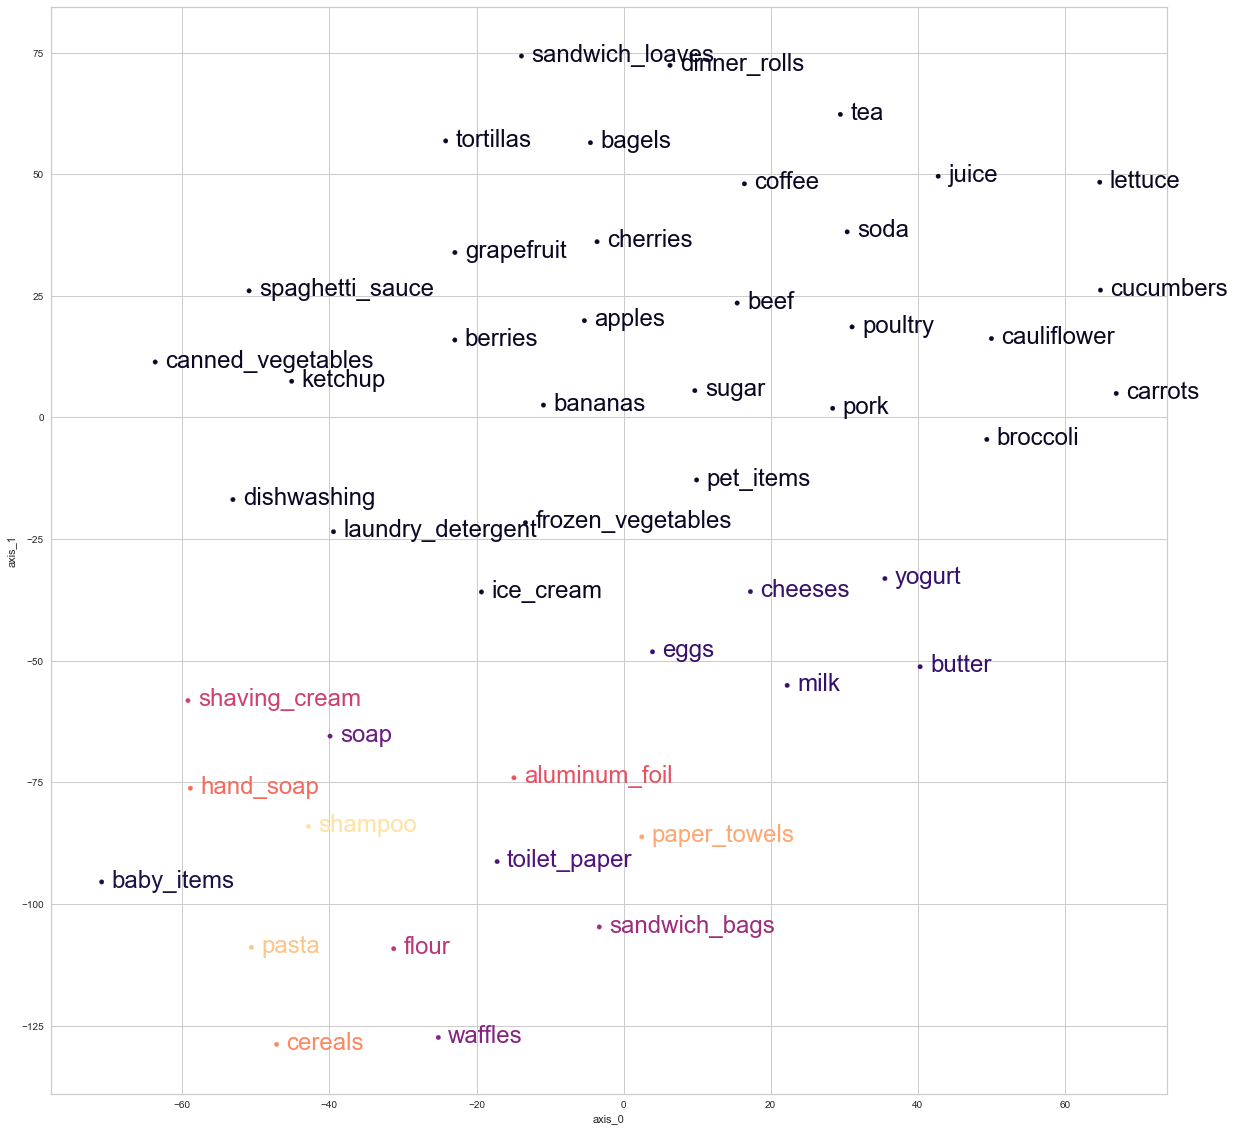

In [54]:
colors_dict = dict(enumerate(sns.color_palette('magma',n_clusters)))
mycolors = [colors_dict[k] for k in agg_labels]

fig, ax = plt.subplots(figsize=(20,20))
df_tsne.plot.scatter(x='axis_0',y='axis_1',color=mycolors,ax=ax)

i = 0
for name,(x,y) in df_tsne.iloc[:,:2].iterrows():
    ax.annotate(name,[x,y], 
                xytext=(10,-5), 
                textcoords='offset points',
                size=24, 
                color=mycolors[i])
    i+=1

In [55]:
df_labels = pd.DataFrame({
    'item': df_item_sim.columns.to_numpy(),
    'label': agg_labels})


df_labels.head(2)

,item,label
0,sugar,0
1,carrots,0


In [56]:
pd.set_option('display.max_colwidth', None)
df_labels.groupby('label')['item'].apply(list).to_frame()

,item
label,
0,"[sugar, carrots, bagels, beef, laundry_detergent, lettuce, grapefruit, frozen_vegetables, tea, cherries, spaghetti_sauce, dishwashing, canned_vegetables, pet_items, apples, tortillas, ice_cream, dinner_rolls, juice, sandwich_loaves, berries, ketchup, cucumbers, coffee, broccoli, cauliflower, bananas, pork, poultry, soda]"
1,[baby_items]
2,"[eggs, milk, cheeses, yogurt, butter]"
3,[toilet_paper]
4,[soap]
5,[waffles]
6,[sandwich_bags]
7,[flour]
8,[shaving_cream]


# Time taken

In [57]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 0 min 10 secs
